In [24]:
%load_ext autoreload
%autoreload 2

import cv2
import numpy as np
import PIL
from scipy.ndimage import gaussian_filter

from pathlib import Path
import sys
sys.path.append(str(Path(__session__).parent.parent))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
from utils import *
from detect import *
from scipy.ndimage import distance_transform_edt
from skimage.morphology import medial_axis, skeletonize

LOOKUP_RADIUS_FACTOR = .5
ANGLE_LOOKUP_RANGE = 40
R1_MUL = 1.
A_RANGE_MUL = 1.

In [3]:
db = SalamandraDB(load_images=True)

In [4]:
salamandra = db.content['3']
dist = mask_distance_transform(salamandra.body.detection.mask)
ridge = ridge_from_distance(dist)
scale = np.quantile(dist[dist > 0], .9)

In [5]:
mask = dist * (dist > scale)
skel_thin = skeletonize(mask)
r = LOOKUP_RADIUS_FACTOR * scale
a_range = ANGLE_LOOKUP_RANGE
pp = trace_ridges(skel_thin, r, a_range)
b = bezier_from_polyline(pp)

In [41]:
pts = [bezier_point_tangent_at_arc(b, t) for t in np.arange(0, 1, .01)]
widths = [line_continous_intersect(mask, pt[0], perpendicular_vector(pt[1])) for pt in pts]

In [42]:
widths

[17.1126708984375,
 26.0643310546875,
 33.141357421875,
 39.3743896484375,
 40.015380859375,
 40.556884765625,
 43.6124267578125,
 44.4317626953125,
 37.8753662109375,
 31.5662841796875,
 27.1683349609375,
 20.0494384765625,
 15.0308837890625,
 13.0556640625,
 11.0689697265625,
 11.0718994140625,
 10.0570068359375,
 11.0440673828125,
 14.0343017578125,
 15.0335693359375,
 15.0179443359375,
 16.001953125,
 18.0089111328125,
 20.0775146484375,
 22.1888427734375,
 25.3160400390625,
 29.4306640625,
 29.443359375,
 28.6343994140625,
 22.5673828125,
 19.451416015625,
 17.2916259765625,
 15.13623046875,
 15.0753173828125,
 15.054443359375,
 15.0609130859375,
 17.1116943359375,
 18.1549072265625,
 21.2047119140625,
 24.2459716796875,
 26.261474609375,
 26.2645263671875,
 26.30859375,
 26.29638671875,
 28.484619140625,
 28.1424560546875,
 30.053466796875,
 32.015869140625,
 33.0054931640625,
 34.0067138671875,
 34.02099609375,
 35.027587890625,
 35.0269775390625,
 36.020751953125,
 37.010131835

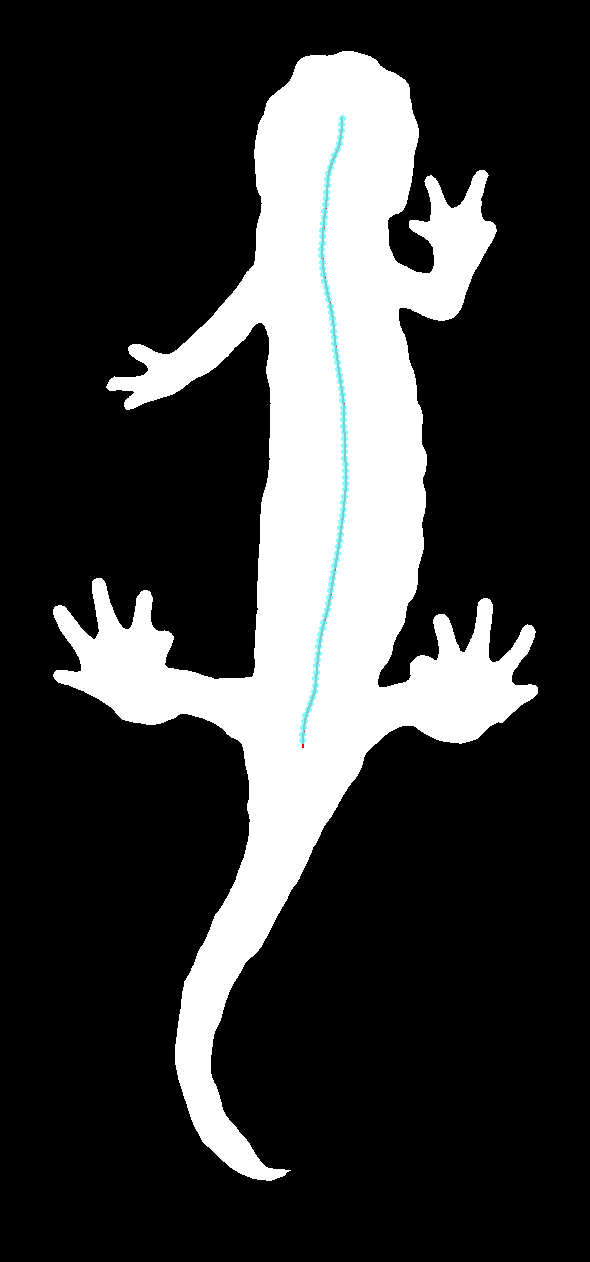

In [38]:
PIL.Image.fromarray(overlay_points(draw_bezier(salamandra.body.detection.mask, b), [pt[0] for pt in pts], color=(100,255,255)))

In [21]:
r = LOOKUP_RADIUS_FACTOR * scale
a_range = ANGLE_LOOKUP_RANGE
pp = trace_ridges(skel, skel_thin, r, a_range, R1_MUL * 4, A_RANGE_MUL * 2)
b = bezier_from_polyline(pp)

In [150]:
deep = dist * (dist >= scale)
deep_ridge = ridge_from_distance(deep)
r = LOOKUP_RADIUS_FACTOR * scale
a_range = ANGLE_LOOKUP_RANGE
pp = trace_ridges(ridge, deep_ridge, r, a_range, R1_MUL * 4, A_RANGE_MUL * 2)
b = bezier_from_polyline(pp)

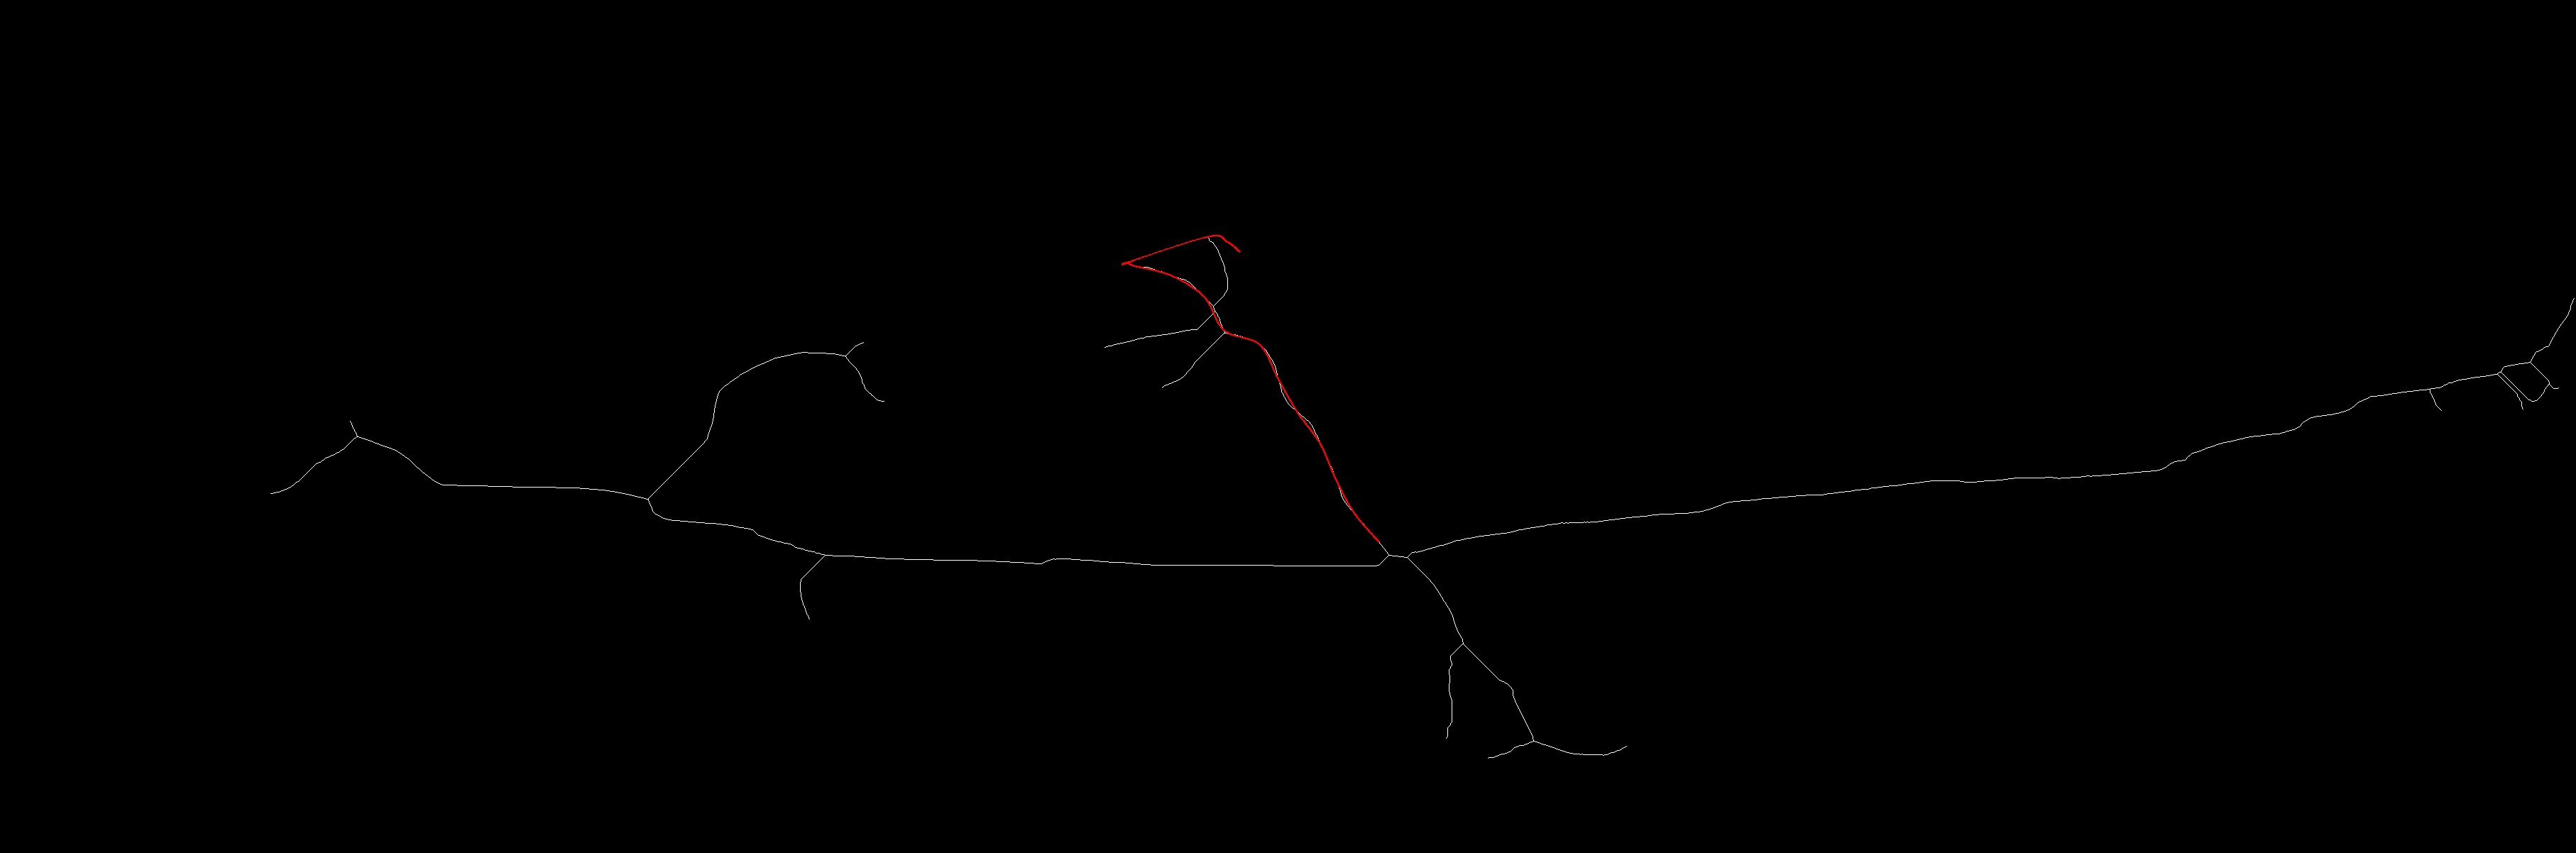

In [23]:
PIL.Image.fromarray(draw_bezier(skel_thin, b))

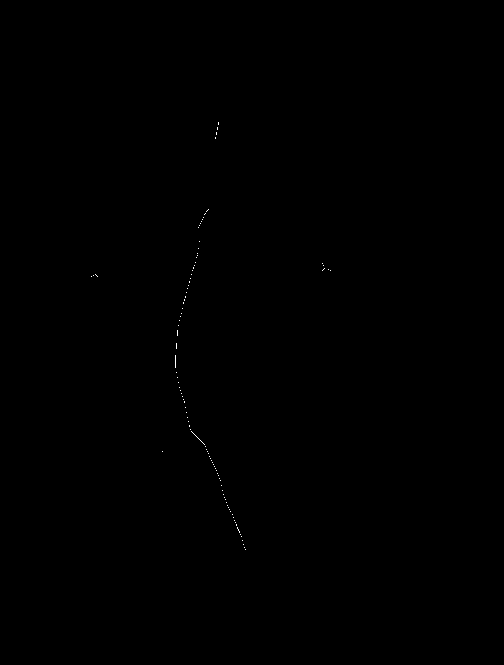

In [152]:
scale1 = np.quantile(dist[dist > 0], .7)
mid = dist * (dist >= scale1)
show_monochrome(ridge_from_distance(mid))